# IMPORTING LIBARIES

In [15]:
# Basic libaries
import pandas as pd
import numpy as np

In [54]:
# Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [55]:
# PreProcessing Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification

In [4]:
# Logistic Regression Model And Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

# READING THE DATA SET AND UNDERSTANDING

In [17]:
dataset=pd.read_csv("C:\\Users\\ziege\\Downloads\\C&T train dataset.csv")

In [18]:
dataset

,sno,acc_info,duration_month,credit_history,purpose,savings_acc,employment_st,poi,personal_status,gurantors,...,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,Group_no
0,1,A11,6,A34,A43,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2,A173,1,A192,A201,3
1,2,A12,48,A32,A43,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1,A173,1,A191,A201,1
2,3,A14,12,A34,A46,A61,A74,2.0,A93,A101,...,A121,49.0,A143,A152,1,A172,2,A191,A201,2
3,4,A11,42,A32,A42,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1,A173,2,A191,A201,1
4,5,A11,24,A33,A40,A61,A73,3.0,A93,A101,...,A124,53.0,A143,A153,2,A173,2,A191,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,A14,9,A32,A42,A62,A72,2.0,A92,A101,...,A122,22.0,A143,A151,1,A173,1,A191,A201,2
796,797,A11,18,A32,A41,A65,A75,1.0,A93,A101,...,A122,51.0,A143,A153,1,A173,2,A192,A201,1
797,798,A14,12,A34,A42,A61,A72,2.0,A92,A101,...,A122,22.0,A143,A151,2,A172,1,A191,A201,3
798,799,A14,24,A33,A40,A65,A75,4.0,A94,A101,...,A123,54.0,A143,A152,2,A173,1,A192,A201,3


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               800 non-null    int64  
 1   acc_info          800 non-null    object 
 2   duration_month    800 non-null    int64  
 3   credit_history    800 non-null    object 
 4   purpose           800 non-null    object 
 5   savings_acc       800 non-null    object 
 6   employment_st     792 non-null    object 
 7   poi               788 non-null    float64
 8   personal_status   800 non-null    object 
 9   gurantors         792 non-null    object 
 10  resident_since    800 non-null    int64  
 11  property_type     800 non-null    object 
 12  age               796 non-null    float64
 13  installment_type  800 non-null    object 
 14  housing_type      793 non-null    object 
 15  credits_no        800 non-null    int64  
 16  job_type          800 non-null    object 
 1

In [20]:
dataset.dtypes


sno                   int64
acc_info             object
duration_month        int64
credit_history       object
purpose              object
savings_acc          object
employment_st        object
poi                 float64
personal_status      object
gurantors            object
resident_since        int64
property_type        object
age                 float64
installment_type     object
housing_type         object
credits_no            int64
job_type             object
liables               int64
telephone            object
foreigner            object
Group_no              int64
dtype: object

In [21]:
dataset.head()

,sno,acc_info,duration_month,credit_history,purpose,savings_acc,employment_st,poi,personal_status,gurantors,...,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,Group_no
0,1,A11,6,A34,A43,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2,A173,1,A192,A201,3
1,2,A12,48,A32,A43,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1,A173,1,A191,A201,1
2,3,A14,12,A34,A46,A61,A74,2.0,A93,A101,...,A121,49.0,A143,A152,1,A172,2,A191,A201,2
3,4,A11,42,A32,A42,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1,A173,2,A191,A201,1
4,5,A11,24,A33,A40,A61,A73,3.0,A93,A101,...,A124,53.0,A143,A153,2,A173,2,A191,A201,1


In [29]:
dataset.shape

(800, 21)

In [32]:
dataset.columns

Index(['sno', 'acc_info', 'duration_month', 'credit_history', 'purpose',
       'savings_acc', 'employment_st', 'poi', 'personal_status', 'gurantors',
       'resident_since', 'property_type', 'age', 'installment_type',
       'housing_type', 'credits_no', 'job_type', 'liables', 'telephone',
       'foreigner', 'Group_no'],
      dtype='object')

In [33]:
dataset.describe().apply(lambda s : s.apply('{:.2f}'.format))

,sno,duration_month,poi,resident_since,age,credits_no,liables,Group_no
count,800.00,800.00,788.00,800.00,796.00,800.00,800.00,800.00
mean,400.50,20.65,2.95,2.84,35.41,1.40,1.15,2.08
std,231.08,12.16,1.13,1.11,11.50,0.57,0.35,0.74
min,1.00,4.00,1.00,1.00,19.00,1.00,1.00,1.00
25%,200.75,12.00,2.00,2.00,27.00,1.00,1.00,2.00
50%,400.50,18.00,3.00,3.00,33.00,1.00,1.00,2.00
75%,600.25,24.00,4.00,4.00,41.00,2.00,1.00,3.00
max,800.00,72.00,4.00,4.00,75.00,4.00,2.00,3.00


# DATA PREPARATION AND PROCESSING

In [35]:
dataset.isnull().sum()

sno                  0
acc_info             0
duration_month       0
credit_history       0
purpose              0
savings_acc          0
employment_st        8
poi                 12
personal_status      0
gurantors            8
resident_since       0
property_type        0
age                  4
installment_type     0
housing_type         7
credits_no           0
job_type             0
liables              0
telephone            0
foreigner            0
Group_no             0
dtype: int64

In [36]:
def encode(data):
  le=LabelEncoder()
  for i in data.columns:
    if data[i].dtype=='object':
      data[i]=le.fit_transform(data[i])
  return data

In [37]:
encode(dataset)


,sno,acc_info,duration_month,credit_history,purpose,savings_acc,employment_st,poi,personal_status,gurantors,...,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,Group_no
0,1,0,6,4,4,4,4,4.0,2,0,...,0,67.0,2,1,2,2,1,1,0,3
1,2,1,48,2,4,0,2,2.0,1,0,...,0,22.0,2,1,1,2,1,0,0,1
2,3,3,12,4,7,0,3,2.0,2,0,...,0,49.0,2,1,1,1,2,0,0,2
3,4,0,42,2,3,0,3,2.0,2,2,...,1,45.0,2,2,1,2,2,0,0,1
4,5,0,24,3,0,0,2,3.0,2,0,...,3,53.0,2,2,2,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,3,9,2,3,1,1,2.0,1,0,...,1,22.0,2,0,1,2,1,0,0,2
796,797,0,18,2,1,4,4,1.0,2,0,...,1,51.0,2,2,1,2,2,1,0,1
797,798,3,12,4,3,0,1,2.0,1,0,...,1,22.0,2,0,2,1,1,0,0,3
798,799,3,24,3,0,4,4,4.0,3,0,...,2,54.0,2,1,2,2,1,1,0,3


In [38]:
dataset.drop(['sno'] , inplace = True , axis = 1)

In [39]:
#Imputing Missing Values
dataset['poi'] = np.where(dataset['poi'].isna() , dataset['poi'].median(skipna = True) , dataset['poi'])
dataset['age'] = np.where(dataset['age'].isna() , dataset['age'].median(skipna = True) , dataset['age'])
dataset['employment_st'] = np.where(dataset['employment_st'].isna() , dataset['employment_st'].median(skipna = True) , dataset['employment_st'])
dataset['gurantors'] = np.where(dataset['gurantors'].isna() , dataset['gurantors'].median(skipna = True) , dataset['gurantors'])

In [41]:
preprocessor = None

# EXPLORATORY ANALYSIS 

In [43]:
dataset.describe()

,acc_info,duration_month,credit_history,purpose,savings_acc,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,Group_no
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,1.582500,20.65125,2.547500,3.320000,1.106250,2.427500,2.951250,1.673750,0.172500,2.841250,1.36625,35.39625,1.676250,0.955000,1.396250,1.905000,1.147500,0.398750,0.033750,2.076250
std,1.242023,12.15635,1.084765,2.747187,1.567812,1.227447,1.121582,0.700303,0.555094,1.106833,1.06114,11.47154,0.706796,0.566459,0.569773,0.653076,0.354825,0.489947,0.180698,0.744062
min,0.000000,4.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000,19.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,12.00000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,0.000000,2.000000,0.00000,27.00000,2.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,2.000000
50%,1.000000,18.00000,2.000000,3.000000,0.000000,2.000000,3.000000,2.000000,0.000000,3.000000,1.00000,33.00000,2.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,2.000000
75%,3.000000,24.00000,4.000000,4.000000,2.000000,4.000000,4.000000,2.000000,0.000000,4.000000,2.00000,41.00000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,3.000000
max,3.000000,72.00000,4.000000,9.000000,4.000000,5.000000,4.000000,3.000000,3.000000,4.000000,3.00000,75.00000,2.000000,3.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000


In [44]:
dataset.skew()

acc_info            0.009164
duration_month      1.149158
credit_history     -0.025128
purpose             0.597840
savings_acc         1.015169
employment_st      -0.096594
poi                -0.506821
personal_status    -0.283850
gurantors           3.304643
resident_since     -0.277252
property_type       0.034825
age                 1.065179
installment_type   -1.834254
housing_type        0.280841
credits_no          1.267630
job_type           -0.361226
liables             1.991872
telephone           0.414346
foreigner           5.173479
Group_no           -0.123486
dtype: float64

In [45]:
x = dataset.drop(['Group_no'] , axis = 1)
y = dataset['Group_no']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [47]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(640, 19)
(160, 19)
(640,)
(160,)


In [49]:
def model_eval(actual , predicted):
  conf_matrix = confusion_matrix(actual , predicted)
  clas_rep = classification_report(actual , predicted)
  acc_score = accuracy_score(actual , predicted)

  print("The Accuracy of the Model is:" , round(acc_score , 2))
  print(conf_matrix)
  print(clas_rep)

# UNIVARIATE ANALYSIS

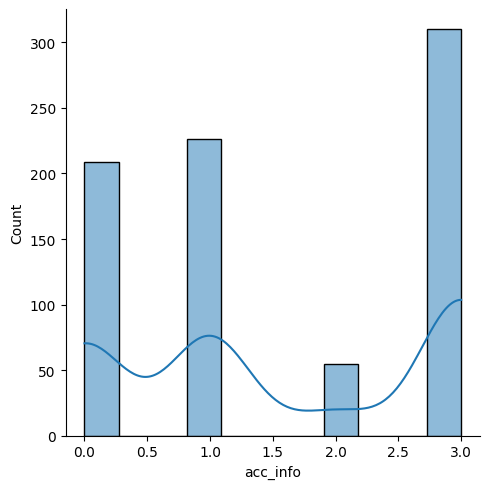

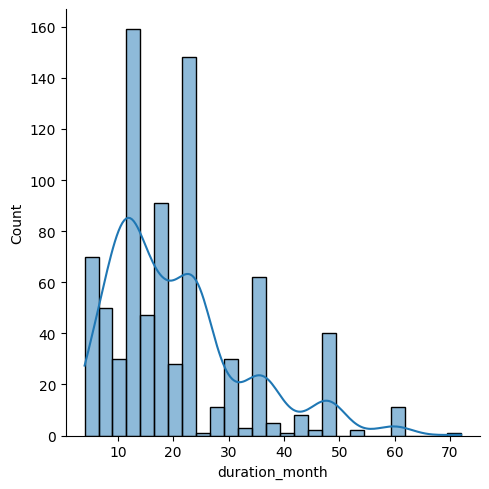

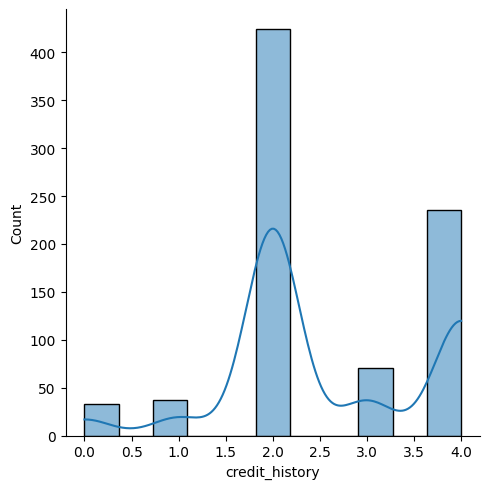

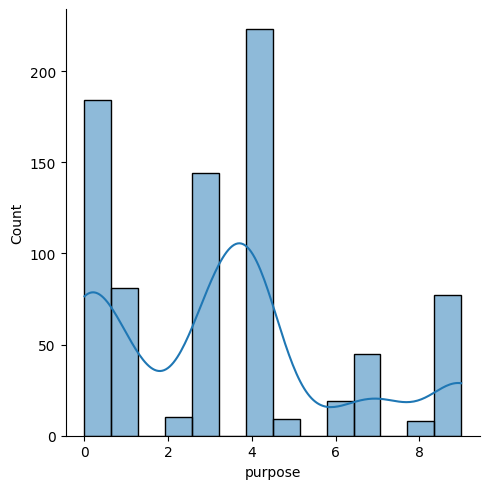

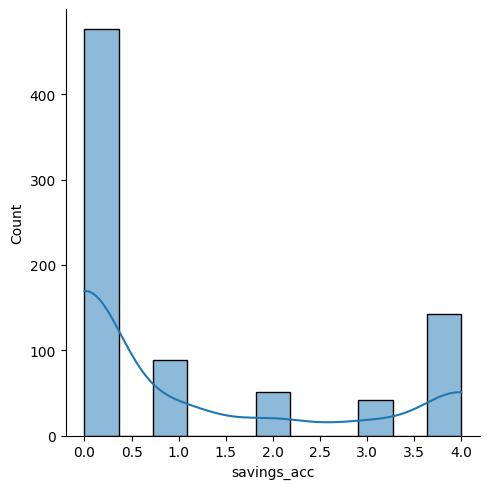

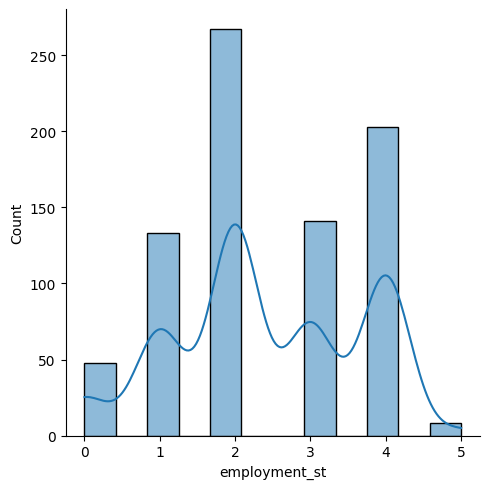

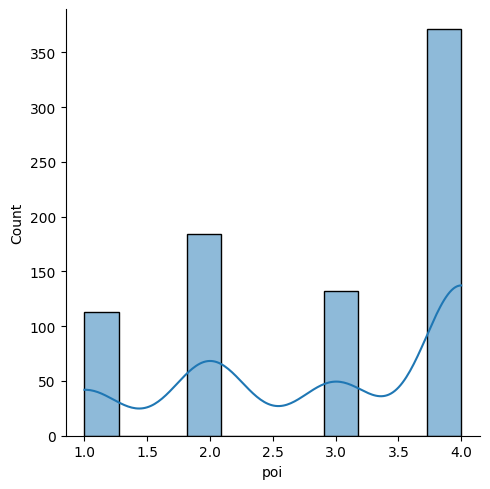

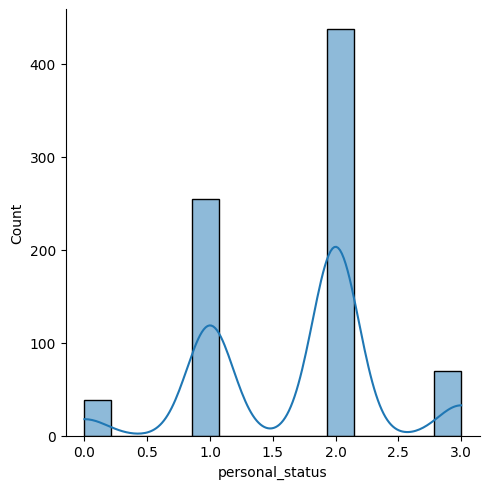

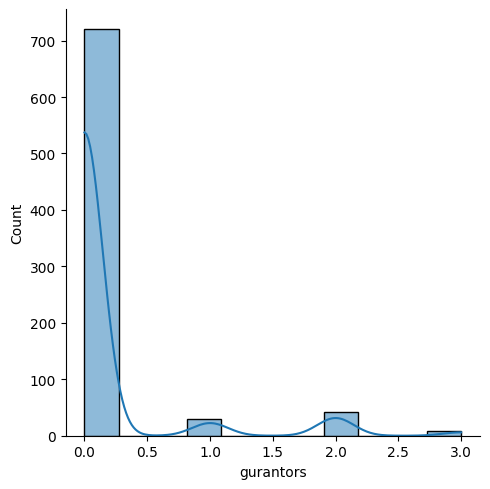

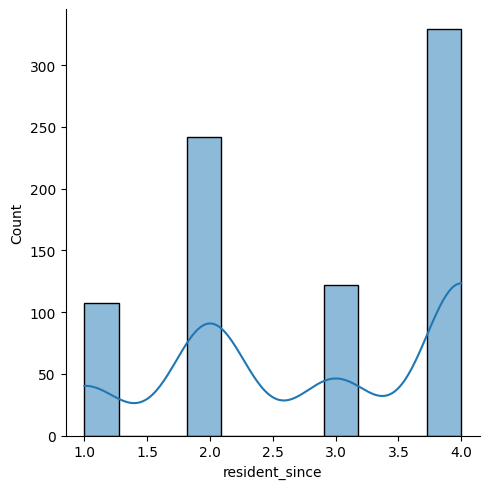

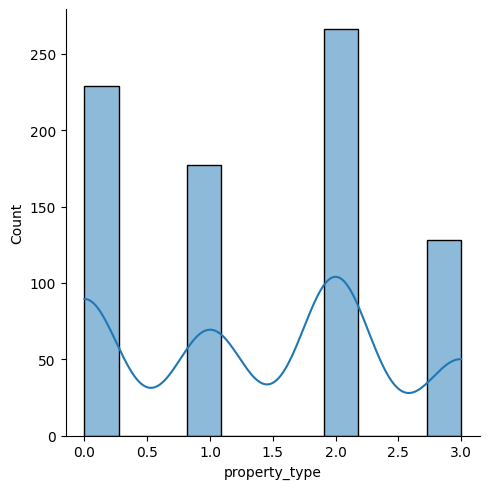

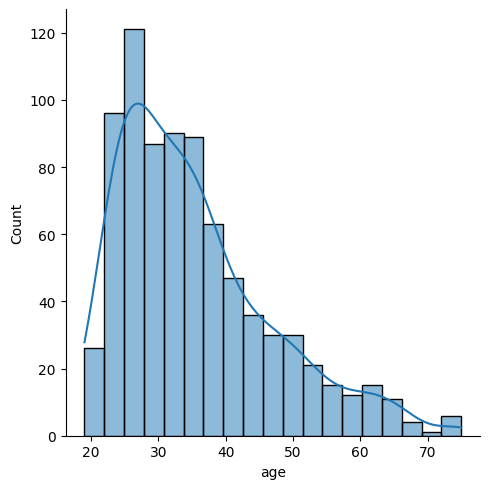

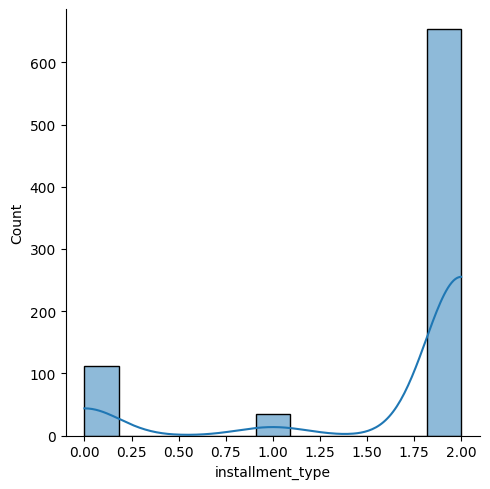

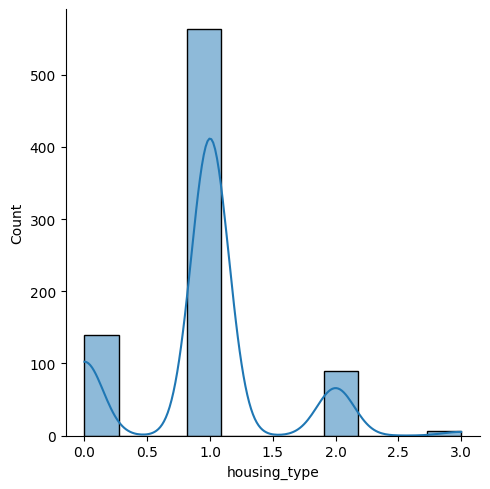

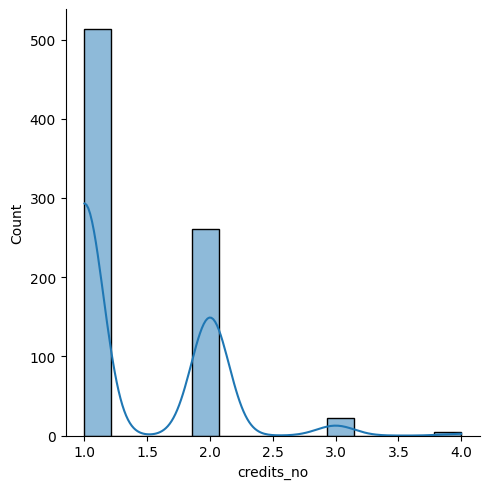

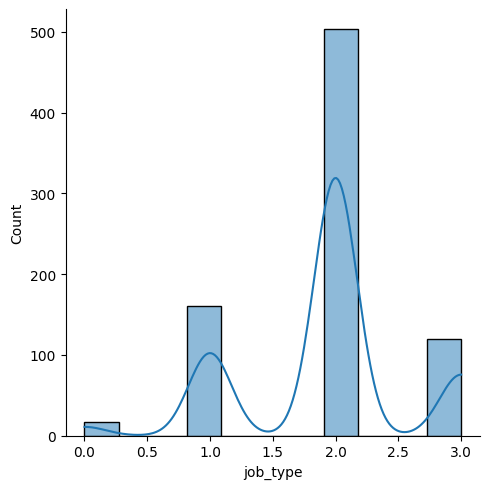

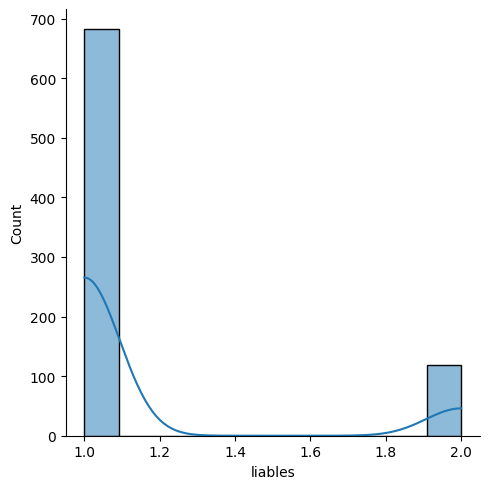

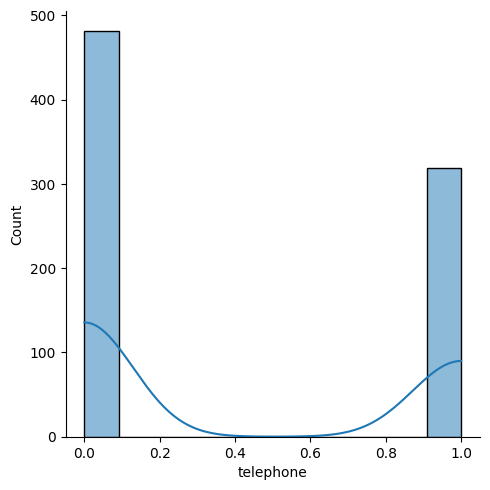

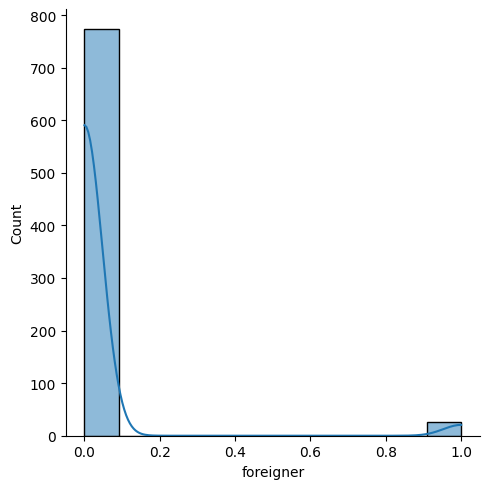

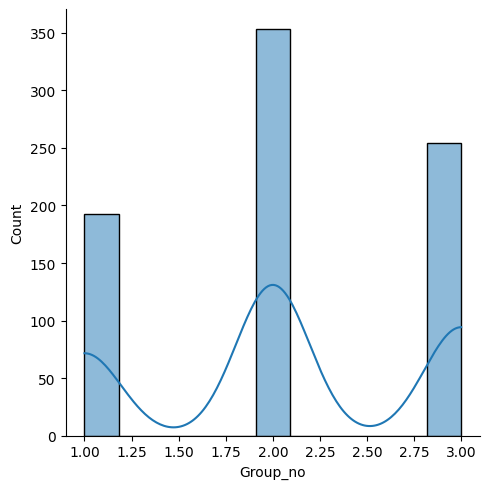

In [50]:
for i in dataset.columns :
   sns.displot(dataset[i] , kde = True)

# BIVARIANT ANALYSIS

<Axes: >

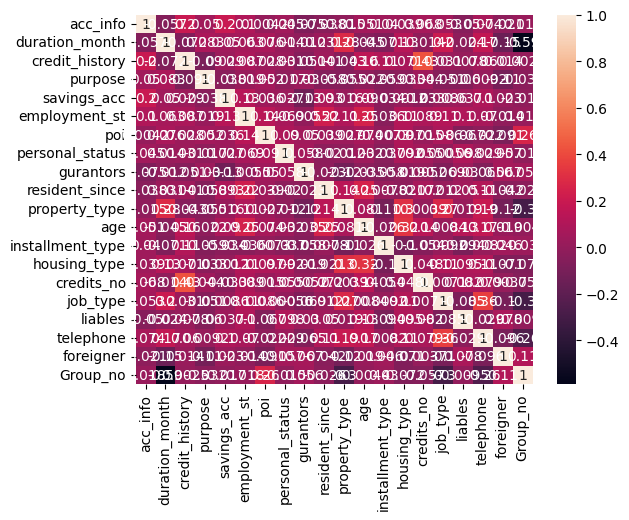

In [51]:
sns.heatmap(dataset.corr(),annot=True)

# logistic regression

In [52]:
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [53]:
y_hat_train = logreg.predict(x_train)
y_hat_test = logreg.predict(x_test)

In [54]:
y_hat_train_logreg = logreg.predict(x_train)
y_hat_test_logreg = logreg.predict(x_test)

In [55]:
model_eval(y_train , y_hat_train_logreg)

The Accuracy of the Model is: 0.69
[[114  45   3]
 [ 29 193  55]
 [  1  68 132]]
              precision    recall  f1-score   support

           1       0.79      0.70      0.75       162
           2       0.63      0.70      0.66       277
           3       0.69      0.66      0.68       201

    accuracy                           0.69       640
   macro avg       0.71      0.69      0.69       640
weighted avg       0.69      0.69      0.69       640



In [56]:
model_eval(y_test , y_hat_test_logreg)

The Accuracy of the Model is: 0.62
[[18 13  0]
 [11 50 15]
 [ 0 22 31]]
              precision    recall  f1-score   support

           1       0.62      0.58      0.60        31
           2       0.59      0.66      0.62        76
           3       0.67      0.58      0.63        53

    accuracy                           0.62       160
   macro avg       0.63      0.61      0.62       160
weighted avg       0.62      0.62      0.62       160



# RANDOM FOREST

In [57]:
rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

In [58]:
y_hat_train_rf=rf.predict(x_train)
y_hat_test_rf=rf.predict(x_test)

In [59]:
model_eval(y_test, y_hat_test_rf)

The Accuracy of the Model is: 0.6
[[17 12  2]
 [ 8 46 22]
 [ 1 19 33]]
              precision    recall  f1-score   support

           1       0.65      0.55      0.60        31
           2       0.60      0.61      0.60        76
           3       0.58      0.62      0.60        53

    accuracy                           0.60       160
   macro avg       0.61      0.59      0.60       160
weighted avg       0.60      0.60      0.60       160



In [60]:

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(random_state=42))])
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

clf.fit(x_train, y_train)

# Evaluate the model
y_pred = clf.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy on validation set:", accuracy)

Accuracy on validation set: 0.6640625


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# Generate some example data
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Train a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Get feature importances
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]


print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))



Feature ranking:
1. feature 6 (0.377499)
2. feature 2 (0.216511)
3. feature 8 (0.124834)
4. feature 0 (0.106399)
5. feature 1 (0.031763)
6. feature 4 (0.031335)
7. feature 9 (0.029534)
8. feature 7 (0.028541)
9. feature 5 (0.027155)
10. feature 3 (0.026429)


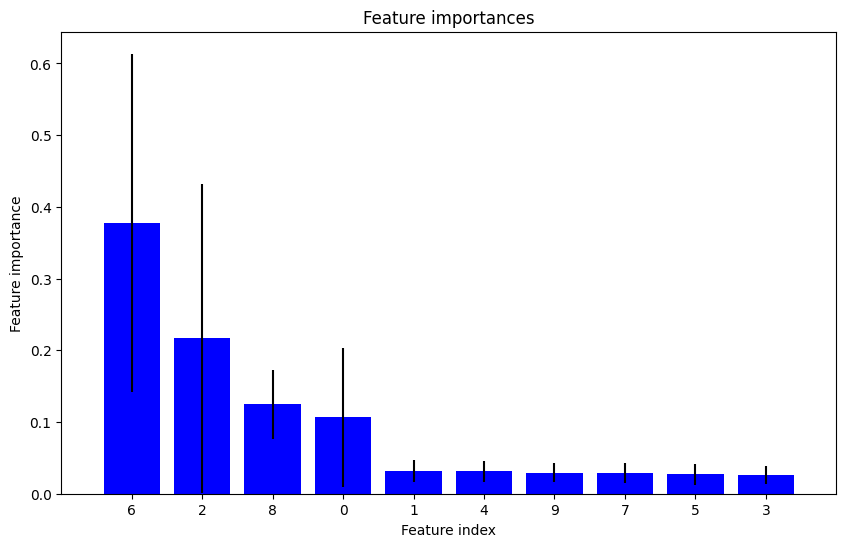

In [62]:
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="b", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Feature index")
plt.ylabel("Feature importance")
plt.show()


# DECISION TREE CLASSIFIER 

In [64]:
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [65]:
y_hat_test_dtree = dtree.predict(x_test)
y_hat_train_dtree = dtree.predict(x_train)

In [66]:
model_eval(y_train, y_hat_train_dtree)

The Accuracy of the Model is: 0.64
[[ 73  51   1]
 [ 21 183  22]
 [  0  90  71]]
              precision    recall  f1-score   support

           1       0.78      0.58      0.67       125
           2       0.56      0.81      0.67       226
           3       0.76      0.44      0.56       161

    accuracy                           0.64       512
   macro avg       0.70      0.61      0.63       512
weighted avg       0.68      0.64      0.63       512



In [67]:
model_eval(y_test, y_hat_test_dtree)

The Accuracy of the Model is: 0.61
[[16 15  0]
 [10 58  8]
 [ 1 29 23]]
              precision    recall  f1-score   support

           1       0.59      0.52      0.55        31
           2       0.57      0.76      0.65        76
           3       0.74      0.43      0.55        53

    accuracy                           0.61       160
   macro avg       0.63      0.57      0.58       160
weighted avg       0.63      0.61      0.60       160



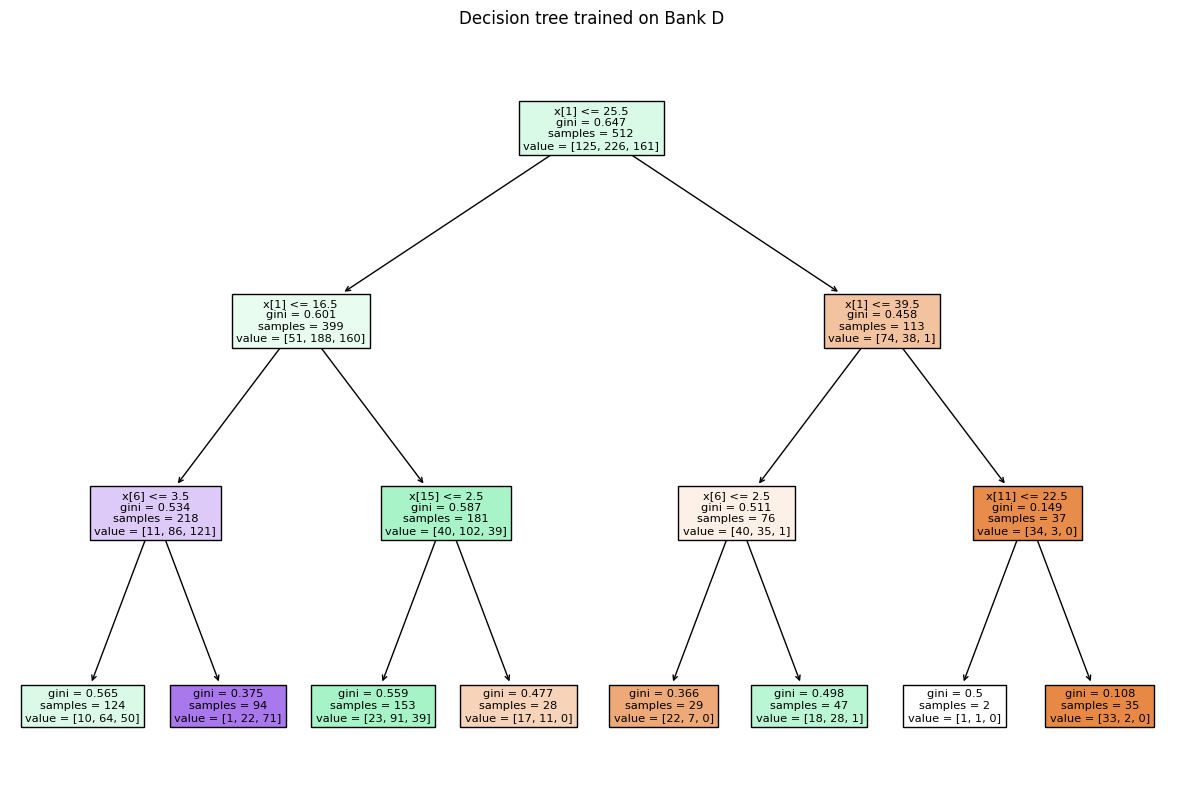

In [68]:
plt.figure(figsize=(15,10))
clf=DecisionTreeClassifier(max_depth=3)
clf.fit(x_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on Bank D")
plt.show()

# TEST DATASET UNDERSTANDING

In [70]:
dataset1=pd.read_csv("C:\\Users\\ziege\\Downloads\\C&T test dataset.csv")

In [71]:
dataset1


,sno,acc_info,duration_month,credit_history,purpose,savings_acc,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,A14,24,A34,A46,A61,A75,4.0,A93,A101,4,A124,54.0,A143,A153,2,A173,2,A191,A201
1,2,A12,18,A34,A43,A61,A75,3.0,A92,A103,4,A121,48.0,A141,A151,2,A172,1,A192,A201
2,3,A11,20,A34,A42,A61,A75,1.0,A92,A101,4,A122,24.0,A143,A152,2,A173,1,A191,A201
3,4,A14,12,A34,A43,A65,A75,4.0,A93,A101,4,A123,35.0,A143,A152,2,A173,1,A191,A201
4,5,A12,12,A32,A40,A65,A71,1.0,A92,A101,2,A121,24.0,A143,A151,1,A171,1,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,A14,12,A32,A42,A61,A74,3.0,A92,A101,4,A121,31.0,A143,A152,1,A172,1,A191,A201
196,197,A11,30,A32,A41,A61,NaN,4.0,A91,A101,4,A122,40.0,A143,A152,1,A174,1,A192,A201
197,198,A14,12,A32,A43,A61,A75,4.0,A93,A101,4,A123,38.0,A143,NaN,1,A173,1,A191,A201
198,199,A11,45,A32,A43,A61,A73,4.0,A93,A101,4,A124,23.0,A143,A153,1,A173,1,A192,A201


In [72]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acc_info          800 non-null    int32  
 1   duration_month    800 non-null    int64  
 2   credit_history    800 non-null    int32  
 3   purpose           800 non-null    int32  
 4   savings_acc       800 non-null    int32  
 5   employment_st     800 non-null    float64
 6   poi               800 non-null    float64
 7   personal_status   800 non-null    int32  
 8   gurantors         800 non-null    float64
 9   resident_since    800 non-null    int64  
 10  property_type     800 non-null    int32  
 11  age               800 non-null    float64
 12  installment_type  800 non-null    int32  
 13  housing_type      800 non-null    int32  
 14  credits_no        800 non-null    int64  
 15  job_type          800 non-null    int32  
 16  liables           800 non-null    int64  
 1

In [57]:

dataset1['poi'] = np.where(dataset1['poi'].isna() , dataset1['poi'].median(skipna = True) , dataset1['poi'])
dataset1['age'] = np.where(dataset1['age'].isna() , dataset1['age'].median(skipna = True) , dataset1['age'])
dataset1['employment_st'] = np.where(dataset1['employment_st'].isna() , dataset1['employment_st'].mode(dropna = True) , dataset1['employment_st'])
dataset1['gurantors'] = np.where(dataset1['gurantors'].isna() , dataset1['gurantors'].mode(dropna = True) , dataset1['gurantors'])
dataset1['housing_type'] = np.where(dataset1['housing_type'].isna() , dataset1['housing_type'].mode(dropna = True) , dataset1['housing_type'])

In [58]:
def encode(data):
  le=LabelEncoder()
  for i in data.columns:
    if data[i].dtype=='object':
      data[i]=le.fit_transform(data[i])
  return data

In [59]:
encode(dataset1)

,sno,acc_info,duration_month,credit_history,purpose,savings_acc,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,3,24,4,7,0,4,4.0,2,0,4,3,54.0,2,2,2,2,2,0,0
1,2,1,18,4,4,0,4,3.0,1,2,4,0,48.0,0,0,2,1,1,1,0
2,3,0,20,4,3,0,4,1.0,1,0,4,1,24.0,2,1,2,2,1,0,0
3,4,3,12,4,4,4,4,4.0,2,0,4,2,35.0,2,1,2,2,1,0,0
4,5,1,12,2,0,4,0,1.0,1,0,2,0,24.0,2,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,3,12,2,3,0,3,3.0,1,0,4,0,31.0,2,1,1,1,1,0,0
196,197,0,30,2,1,0,2,4.0,0,0,4,1,40.0,2,1,1,3,1,1,0
197,198,3,12,2,4,0,4,4.0,2,0,4,2,38.0,2,1,1,2,1,0,0
198,199,0,45,2,4,0,2,4.0,2,0,4,3,23.0,2,2,1,2,1,1,0


In [60]:
dataset1.drop(['sno'] , inplace = True , axis = 1)

In [61]:
dataset1['Group_no'] = logreg.predict(dataset1)

In [62]:
dataset1.head()

,acc_info,duration_month,credit_history,purpose,savings_acc,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,Group_no
0,3,24,4,7,0,4,4.0,2,0,4,3,54.0,2,2,2,2,2,0,0,2
1,1,18,4,4,0,4,3.0,1,2,4,0,48.0,0,0,2,1,1,1,0,2
2,0,20,4,3,0,4,1.0,1,0,4,1,24.0,2,1,2,2,1,0,0,2
3,3,12,4,4,4,4,4.0,2,0,4,2,35.0,2,1,2,2,1,0,0,3
4,1,12,2,0,4,0,1.0,1,0,2,0,24.0,2,0,1,0,1,0,0,2


# FINALIZED FILE

In [64]:
final=pd.read_csv("C:\\Users\\ziege\\Downloads\\C&T Bank_sample_submission.csv")

In [65]:
final.head()

,serial number,Group_no
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [66]:
final['Group_no']=dataset1['Group_no']

In [67]:
final.head()

,serial number,Group_no
0,1,2
1,2,2
2,3,2
3,4,3
4,5,2


# DOWNLOADING THE FILE

In [75]:
final.to_csv("C:\\Users\\ziege\\Downloads\\C&T Bank_sample_submission.csv",index=False)